In [ ]:
# !pip install scikit-learn

In [5]:
from sklearn.decomposition import PCA # Principal Components Analysis
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
x,y = make_blobs(n_samples = 1000,n_features = 10, centers = 5)
df = pd.DataFrame(data = x, columns = ["variable_" + str(i) for i in range(10)])
df

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9
0,-0.532500,5.764882,-4.055403,3.835965,-1.185682,-9.112782,-3.316403,-3.443913,-4.298432,5.531530
1,2.700428,0.489665,5.988814,-8.893771,-10.088705,-10.882456,5.444942,0.724792,-6.772124,2.534533
2,0.708201,4.409456,-3.660176,4.798108,0.715091,-8.601777,-1.891219,-5.172184,-2.085189,6.584385
3,-2.910081,3.240915,5.716431,-2.308480,0.303056,5.924796,-6.992325,1.245883,7.330076,12.206077
4,9.614651,2.672591,-2.982653,3.305575,2.156516,7.583653,-8.081623,-0.824944,-3.029795,4.860781
...,...,...,...,...,...,...,...,...,...,...
995,-3.989659,3.111160,4.443206,-1.451357,2.343193,6.812731,-9.304363,-0.041299,4.265568,8.323356
996,8.619613,3.558375,-1.160657,4.167520,0.173035,6.855761,-7.788468,-1.691572,-2.555373,4.003508
997,-5.957759,4.777891,8.031656,-2.923042,1.231774,6.508088,-7.716659,2.252539,6.095603,8.193283
998,0.144286,-1.048658,-0.425563,-9.515859,5.753291,6.470495,8.847914,9.485499,9.180314,-6.539454


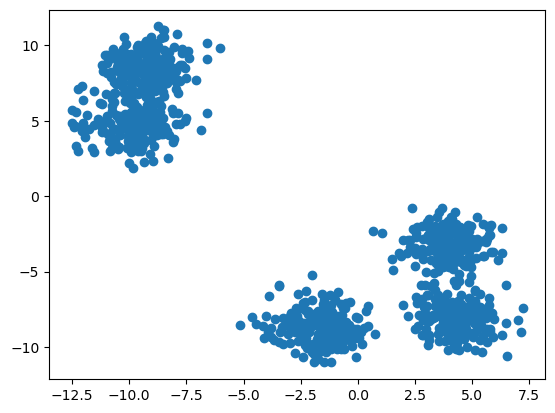

In [37]:
plt.scatter(df["variable_3"], df["variable_6"])
plt.show()

In [26]:
n = 2
pca = PCA(n_components=n)
x_transformed = pca.fit_transform(df)
df_transformed = pd.DataFrame(data = x_transformed, columns = ['Componente ' + str(i+1) for i in range(n)])
df_transformed

,Componente 1,Componente 2
0,-12.268101,3.495361
1,-2.025630,18.555262
2,-11.604012,2.275747
3,-0.149086,-10.086638
4,-6.395714,-10.146931
...,...,...
995,-1.173531,-11.113372
996,-6.880167,-9.115473
997,1.849317,-9.968587
998,21.351255,-0.474042


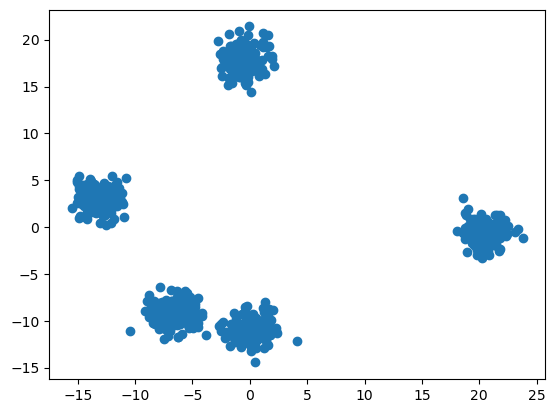

In [27]:
plt.scatter(df_transformed["Componente 1"], df_transformed["Componente 2"])
plt.show()

In [28]:
sum(pca.explained_variance_ratio_)

0.7466201816678343

Ejercicio de clusterización sobre mi dataset con 10 variables

In [20]:
from sklearn.cluster import KMeans

In [29]:
# Mi decisión de 5 clsuters la hago por la gráfica
kmeans = KMeans(5)
kmeans.fit(df)
centroides = kmeans.cluster_centers_
centroides_transformed = pca.transform(centroides)

c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\alonso.sandoval\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [30]:
centroides

array([[ 9.88015961,  2.61840119, -2.79439824,  4.34747607,  0.34272014,
         6.7255553 , -8.10085437, -0.38296762, -2.65938339,  3.59893882],
       [ 0.61681472, -0.274548  , -0.26417792, -9.24230225,  5.35825719,
         6.25756314,  8.60357258,  8.61891063,  9.18090527, -6.25886318],
       [ 2.62734024, -1.26542323,  5.82715368, -9.86287623, -9.42723783,
        -9.94504136,  4.66131688,  0.30867747, -5.77614165,  1.51222772],
       [-4.24361194,  4.32552162,  6.96261091, -1.75242007,  1.12500983,
         6.47289437, -8.62964171,  1.28641388,  6.51798803,  9.42573828],
       [ 0.18148773,  5.52780133, -4.5911233 ,  3.9770731 ,  0.37433104,
        -9.38334937, -3.24146411, -5.50085189, -3.87261186,  6.47315986]])

In [31]:
centroides_transformed

array([[ -6.63203606,  -9.23341765],
       [ 20.40850194,  -0.50670332],
       [ -0.64991088,  17.82603363],
       [  0.07201979, -11.00804804],
       [-13.1985748 ,   2.92213538]])

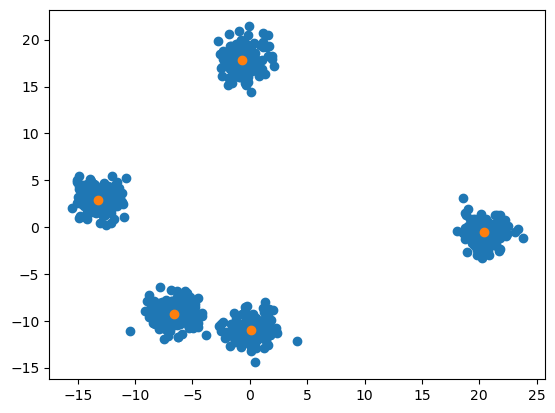

In [33]:
plt.scatter(df_transformed["Componente 1"], df_transformed["Componente 2"])
plt.scatter(centroides_transformed[:,0], centroides_transformed[:,1], marker = "o")
plt.show()